<a href="https://colab.research.google.com/github/tim530712345/20210612_pandas/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [2]:
# 50000: 一維的串列， (50000, 1): 二維表格
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names= [
    'airplan',										
    'automobile',										
    'bird',									
    'cat',									
    'deer',									
    'dog',								
    'frog',								
    'horse',								
    'ship',								
    'truck'
]

bird


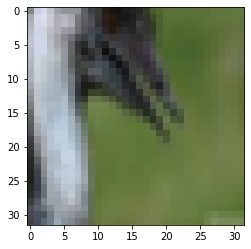

In [4]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # 圖片
from tensorflow.keras.layers import Dense, Flatten, Dropout # Flatten 攤平
layers = [
          # 每個卷積核都是一個梯度下降的結果
          # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
          Conv2D(64, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
          MaxPool2D(),
          # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
          Conv2D(128, 3, activation='relu', padding='same'),
          MaxPool2D(),
          # 3 * 3 * 128(一個) * 256 + 256(bias) = 295168
          Conv2D(256, 3, activation='relu', padding='same'),
          MaxPool2D(),
          Flatten(),
          # 過擬合: 過度依賴某個神經元
          # dropout(0.25-0.5): 訓練時(64)，隨機丟棄25%-50%的神經元，測試時(128)
          # 使用dropout，是為了應付特殊狀況，準確率不一定會上升
          Dense(128, activation='relu'),
          Dropout(0.25),
          Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             